In [ ]:
import numpy as np
import keras
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,History
#from sklearn.metrics import confusion_matrix
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import itertools
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
#@title
keras.__version__

'2.13.1'

In [ ]:
model=keras.models.load_model("./raks_model14.h5")

In [ ]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

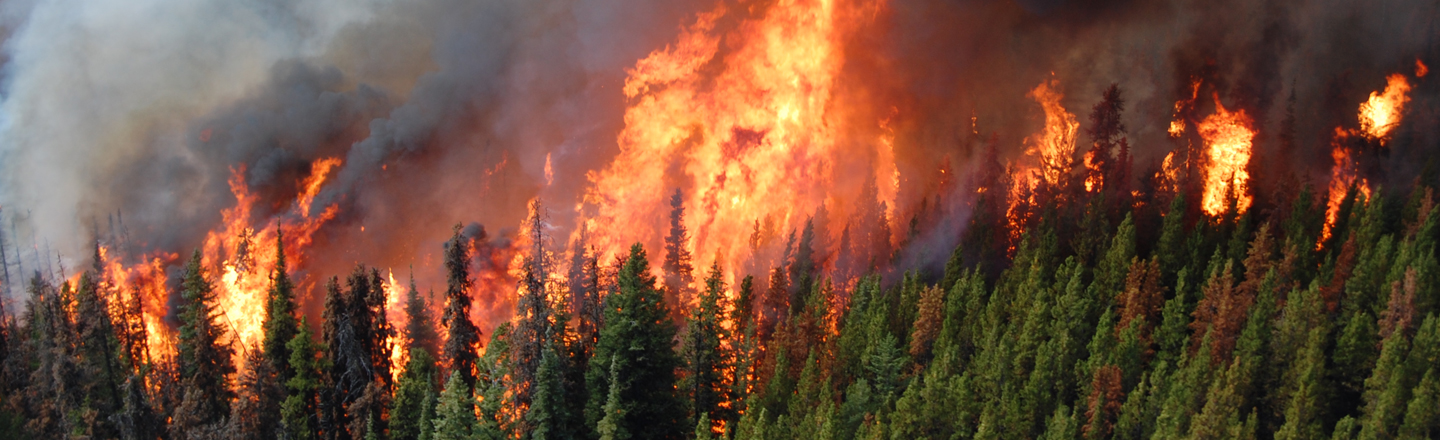

In [ ]:
from IPython.display import Image
Image(filename='./bcws-carousel-2.jpg', width=300,height=200)

In [ ]:
preprocessed_image = prepare_image('./bcws-carousel-2.jpg')
predictions = model.predict(preprocessed_image)
print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
labels=(predictions>0.5).astype(np.int)
#print(labels)
if labels[0][0]==1 :
    print("Fire detected")
else:
    print("No Fire detected")

1/1 [==============================] - 1s 838ms/step
Fire : 99.9%  |Not Fire: 0.00%
Fire detected


<ipython-input-38-cd56d4417987>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=(predictions>0.5).astype(np.int)
